Hi! This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T")[1]

In [3]:
list(df.columns)

['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']

In [4]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413


In [5]:
clean_df = df[df["Neighborhood"] != "Not assigned"]

In [6]:
clean_df = clean_df[clean_df["Latitude"] != "Not assigned"]

In [7]:
clean_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
7,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
9,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
10,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786
11,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.0809,-114.1616


In [8]:
df_merged = clean_df.groupby(['Postal Code', 'Borough', 'Latitude', 'Longitude'], as_index=False).agg({'Neighborhood': ",".join})
#groupby(['Postcode', 'Borough'])['Neighbourhood']

In [9]:
df_merged.shape

(97, 5)

In [10]:
list(df_merged.columns)

['Postal Code', 'Borough', 'Latitude', 'Longitude', 'Neighborhood']

In [11]:
df_merged.head()

,Postal Code,Borough,Latitude,Longitude,Neighborhood
0,T1A,Medicine Hat,50.036460,-110.679250,Central Medicine Hat
1,T1B,Medicine Hat,50.0172,-110.651,South Medicine Hat
2,T1C,Medicine Hat,50.0556,-110.6822,North Medicine Hat
3,T1H,Lethbridge,49.7118,-112.8196,North Lethbridge
4,T1J,Lethbridge,49.6915,-112.8294,West and Central Lethbridge


In [12]:
list(df_merged.columns)

['Postal Code', 'Borough', 'Latitude', 'Longitude', 'Neighborhood']

In [13]:
from geopy.geocoders import Nominatim

address = 'Alberta'

geolocator = Nominatim(user_agent="alberta_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alberta are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Alberta are 55.001251, -115.002136.


In [46]:
import requests
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 100
radius = 500

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
alberta_venues = getNearbyVenues(names=df_merged['Neighborhood'],
                                   latitudes=df_merged['Latitude'],
                                   longitudes=df_merged['Longitude']
                                  )



Central Medicine Hat
South Medicine Hat
North Medicine Hat
North Lethbridge
West and Central Lethbridge
West and South Lethbridge
Rundle, Whitehorn, Monterey Park
Penbrooke Meadows, Marlborough
Forest Lawn, Dover, Erin Woods
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Bridgeland, Greenview, Zoo, YYC
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Highfield, Burns Industrial
Queensland, Lake Bonavista, Willow Park, Acadia
Thorncliffe, Tuxedo Park
Brentwood, Collingwood, Nose Hill
Mount Pleasant, Capitol Hill, Banff Trail
Kensington, Westmont, Parkdale, University
City Centre, Calgary Tower
Connaught, West Victoria Park
Elbow Park, Britannia, Parkhill, Mission
South Calgary (Altadore / Bankview / Richmond)
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park
Braeside, Cedarbrae, Woodbine
Midnapore, Sundance
Millrise, Somerset, Bridlewood, Evergreen
Douglas Glen, McKenzie Lake, Copperfield, East Shepard
Dalhousie, Edgemont, Hamptons, Hidden Valley
Montg

In [17]:
print(alberta_venues.shape)

(757, 7)


In [18]:
alberta_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Medicine Hat,50.036460,-110.679250,Local Public Eatery Medicine Hat,50.039218,-110.676133,Pub
1,Central Medicine Hat,50.036460,-110.679250,Madhatter Coffee Roastery,50.039163,-110.677189,Coffee Shop
2,Central Medicine Hat,50.036460,-110.679250,Dairy Queen,50.037920,-110.680125,Ice Cream Shop
3,Central Medicine Hat,50.036460,-110.679250,Esplanade Arts And Heritage Centre,50.039907,-110.680308,Theater
4,Central Medicine Hat,50.036460,-110.679250,Tim Hortons,50.039557,-110.676891,Coffee Shop


In [19]:
alberta_venues["Venue Category"].unique()

array(['Pub', 'Coffee Shop', 'Ice Cream Shop', 'Theater',
       'Sandwich Place', 'Bank', 'American Restaurant', 'Park',
       'Construction & Landscaping', 'Hockey Arena', 'Soccer Field',
       'Vietnamese Restaurant', 'Food & Drink Shop', 'Candy Store', 'Inn',
       'Pharmacy', 'Pizza Place', 'Dessert Shop', 'Grocery Store',
       'Italian Restaurant', 'Gas Station', 'Rental Car Location', 'Café',
       'Restaurant', 'Movie Theater', 'Burger Joint', 'Gastropub',
       'Convenience Store', 'Department Store', 'Fast Food Restaurant',
       'Breakfast Spot', 'Hotel', 'Factory', 'Sports Bar', 'BBQ Joint',
       'Bar', 'Martial Arts School', 'Smoke Shop', 'Clothing Store',
       'Diner', 'Noodle House', 'Asian Restaurant', 'Dim Sum Restaurant',
       'Seafood Restaurant', 'Sushi Restaurant', 'Falafel Restaurant',
       'Steakhouse', 'Chinese Restaurant', 'Indian Restaurant',
       'Middle Eastern Restaurant', 'Hobby Shop', 'Athletics & Sports',
       'Gym / Fitness Center', 

In [20]:
# Filter categories, so only those that contains "restaurant" remains
restaurant_data = alberta_venues[alberta_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)

In [21]:
restaurant_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Medicine Hat,50.036460,-110.679250,The Chocolate Shoppe,50.036291,-110.676984,American Restaurant
1,South Medicine Hat,50.0172,-110.651,Golden Bell,50.016897,-110.657978,Vietnamese Restaurant
2,West and Central Lethbridge,49.6915,-112.8294,Top Pizza & Spaghetti House,49.694726,-112.830580,Italian Restaurant
3,West and South Lethbridge,49.6765,-112.8035,The Keg Steakhouse + Bar - Lethbridge,49.675170,-112.800094,Restaurant
4,West and South Lethbridge,49.6765,-112.8035,The Saigonese,49.679381,-112.803907,Vietnamese Restaurant


In [22]:
restaurant_data["Venue Category"].unique()

array(['American Restaurant', 'Vietnamese Restaurant',
       'Italian Restaurant', 'Restaurant', 'Fast Food Restaurant',
       'Asian Restaurant', 'Dim Sum Restaurant', 'Seafood Restaurant',
       'Sushi Restaurant', 'Falafel Restaurant', 'Chinese Restaurant',
       'Indian Restaurant', 'Middle Eastern Restaurant',
       'Vegetarian / Vegan Restaurant', 'New American Restaurant',
       'Mediterranean Restaurant', 'Japanese Restaurant',
       'Eastern European Restaurant', 'Moroccan Restaurant',
       'Scandinavian Restaurant', 'French Restaurant',
       'Brazilian Restaurant', 'Tapas Restaurant', 'Korean Restaurant',
       'Thai Restaurant', 'Mexican Restaurant', 'Turkish Restaurant',
       'Portuguese Restaurant', 'Halal Restaurant'], dtype=object)

In [23]:
restaurant_data.shape

(178, 7)

In [24]:
restaurant_data["Venue Category"].value_counts()

Fast Food Restaurant             26
Restaurant                       22
Vietnamese Restaurant            14
Asian Restaurant                 12
Italian Restaurant               12
Chinese Restaurant               10
American Restaurant              10
Sushi Restaurant                  9
Middle Eastern Restaurant         8
Mediterranean Restaurant          7
Indian Restaurant                 7
Mexican Restaurant                6
French Restaurant                 5
New American Restaurant           5
Japanese Restaurant               3
Seafood Restaurant                3
Falafel Restaurant                2
Thai Restaurant                   2
Eastern European Restaurant       2
Tapas Restaurant                  2
Moroccan Restaurant               2
Brazilian Restaurant              2
Dim Sum Restaurant                1
Halal Restaurant                  1
Korean Restaurant                 1
Scandinavian Restaurant           1
Vegetarian / Vegan Restaurant     1
Turkish Restaurant          

In [25]:
restaurant_data["Neighborhood"].unique()

array(['Central Medicine Hat', 'South Medicine Hat',
       'West and Central Lethbridge', 'West and South Lethbridge',
       'Bridgeland, Greenview, Zoo, YYC',
       'Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome',
       'Highfield, Burns Industrial',
       'Queensland, Lake Bonavista, Willow Park, Acadia',
       'Thorncliffe, Tuxedo Park', 'Brentwood, Collingwood, Nose Hill',
       'Mount Pleasant, Capitol Hill, Banff Trail',
       'City Centre, Calgary Tower', 'Connaught, West Victoria Park',
       'Elbow Park, Britannia, Parkhill, Mission',
       'Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park',
       'Millrise, Somerset, Bridlewood, Evergreen',
       'Douglas Glen, McKenzie Lake, Copperfield, East Shepard',
       'Dalhousie, Edgemont, Hamptons, Hidden Valley',
       'Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta',
       'Lakeview, Glendale, Killarney, Glamorgan',
       'Discovery Ridge, Signal Hill, West Springs, Christie Estates

In [26]:
restaurant_data["Neighborhood"].value_counts()

North Downtown                                                                           30
Connaught, West Victoria Park                                                            14
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome                          13
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park                               13
Bridgeland, Greenview, Zoo, YYC                                                          12
City Centre, Calgary Tower                                                               12
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta                                      8
Mount Pleasant, Capitol Hill, Banff Trail                                                 7
West Northwest Industrial, Winterburn                                                     7
The Meadows                                                                               6
West Lake District                                                              

In [27]:
# Let's delete those neighborhoods that only have one restaurant, since are not interesting for this study
restaurant_data = restaurant_data.groupby("Neighborhood").filter(lambda x: len(x) > 1)
restaurant_data.shape

(158, 7)

In [28]:
restaurant_data["Neighborhood"].value_counts()

North Downtown                                                           30
Connaught, West Victoria Park                                            14
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome          13
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park               13
City Centre, Calgary Tower                                               12
Bridgeland, Greenview, Zoo, YYC                                          12
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta                      8
West Northwest Industrial, Winterburn                                     7
Mount Pleasant, Capitol Hill, Banff Trail                                 7
The Meadows                                                               6
West Lake District                                                        6
Thorncliffe, Tuxedo Park                                                  3
East Airdrie                                                              3
West and Sou

In [29]:
restaurant_data["Venue Category"].value_counts()

Fast Food Restaurant             26
Restaurant                       22
Vietnamese Restaurant            11
Sushi Restaurant                  9
Italian Restaurant                9
Chinese Restaurant                8
Asian Restaurant                  8
Mediterranean Restaurant          7
Middle Eastern Restaurant         7
Mexican Restaurant                6
Indian Restaurant                 6
American Restaurant               6
New American Restaurant           5
French Restaurant                 5
Seafood Restaurant                3
Japanese Restaurant               2
Brazilian Restaurant              2
Tapas Restaurant                  2
Thai Restaurant                   2
Falafel Restaurant                2
Eastern European Restaurant       2
Moroccan Restaurant               2
Halal Restaurant                  1
Dim Sum Restaurant                1
Scandinavian Restaurant           1
Korean Restaurant                 1
Vegetarian / Vegan Restaurant     1
Turkish Restaurant          

In [38]:
# Now let's study the distribution of the restaurants excluding the fast food (since in this study we focus on foreign restaurants and non-fastfood)

data_without_fastfood = restaurant_data[restaurant_data['Venue Category'] != 'Fast Food Restaurant']

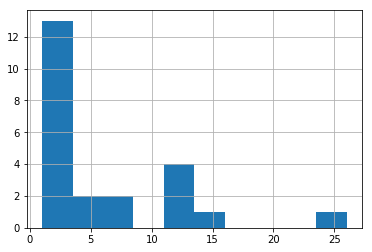

In [39]:
import matplotlib.pyplot as plt
neighb_counts = data_without_fastfood["Neighborhood"].value_counts()
neighb_counts.hist()

# Lot of the neighborhoods have less or equal than 5 restaurants, so it can be filtered

In [40]:
# Now let's pick the neighborhoods that have most of the restaurant
data_without_fastfood= data_without_fastfood.groupby("Neighborhood").filter(lambda x: len(x) > 5)

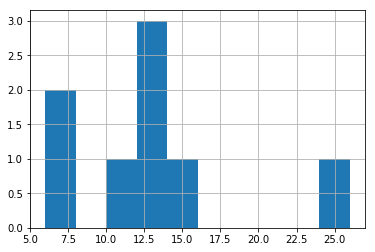

In [41]:
import matplotlib.pyplot as plt
neighb_counts = data_without_fastfood["Neighborhood"].value_counts()
neighb_counts.hist()


In [36]:
data_without_fastfood["Venue Category"].value_counts()

Restaurant                       14
Italian Restaurant                9
Sushi Restaurant                  8
Vietnamese Restaurant             6
Asian Restaurant                  6
Mediterranean Restaurant          6
Middle Eastern Restaurant         6
New American Restaurant           5
Chinese Restaurant                5
Indian Restaurant                 5
Mexican Restaurant                4
French Restaurant                 4
American Restaurant               3
Brazilian Restaurant              2
Seafood Restaurant                2
Tapas Restaurant                  2
Falafel Restaurant                2
Eastern European Restaurant       2
Moroccan Restaurant               2
Dim Sum Restaurant                1
Japanese Restaurant               1
Scandinavian Restaurant           1
Thai Restaurant                   1
Korean Restaurant                 1
Vegetarian / Vegan Restaurant     1
Turkish Restaurant                1
Name: Venue Category, dtype: int64

In [42]:
# Let's suppose that 'Restaurant' means local restaurant. Since we are interested in foreign restaurants, we have to filter it
foreign_restaurant = data_without_fastfood[data_without_fastfood['Venue Category'] != 'Restaurant']

In [43]:
foreign_restaurant["Neighborhood"].value_counts()

North Downtown                                                     22
Connaught, West Victoria Park                                      12
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome    10
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park         10
City Centre, Calgary Tower                                         10
Bridgeland, Greenview, Zoo, YYC                                     9
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta                7
Mount Pleasant, Capitol Hill, Banff Trail                           6
Name: Neighborhood, dtype: int64

In [45]:
# North Downtown has 22 foreign restaurants! Let's take a look at it
north_restaurant = foreign_restaurant[foreign_restaurant['Neighborhood']== 'North Downtown']
north_restaurant["Venue Category"].value_counts()

Italian Restaurant             4
New American Restaurant        2
Indian Restaurant              2
Asian Restaurant               2
Mexican Restaurant             2
French Restaurant              2
Chinese Restaurant             1
Sushi Restaurant               1
Tapas Restaurant               1
Vietnamese Restaurant          1
Turkish Restaurant             1
Eastern European Restaurant    1
Mediterranean Restaurant       1
Falafel Restaurant             1
Name: Venue Category, dtype: int64

Seems a very good zone to open a new foreign restaurant!